In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load dataset
data = pd.read_csv('C:\\Users\\ADMIN\\Desktop\\CODSOFT\\CODSOFT\\CUSTOMER CHURN PREDICTION\\Churn_Modelling.csv')

# Data preprocessing
# Encode categorical variables
label_encoders = {}
for column in ['Geography', 'Gender']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Feature scaling
scaler = StandardScaler()
data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

# Split data into features and target
X = data.drop(['CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
# Function to print model metrics
def print_metrics(y_test, y_pred, model_name):
    print(f'{model_name} Metrics:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision: {precision_score(y_test, y_pred):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred):.4f}')
    print(f'F1 Score: {f1_score(y_test, y_pred):.4f}')
    print(f'ROC AUC: {roc_auc_score(y_test, y_pred):.4f}\n')

print_metrics(y_test, y_pred_logreg, 'Logistic Regression')
print_metrics(y_test, y_pred_rf, 'Random Forest')
print_metrics(y_test, y_pred_gb, 'Gradient Boosting')


Logistic Regression Metrics:
Accuracy: 0.8170
Precision: 0.6098
Recall: 0.1908
F1 Score: 0.2907
ROC AUC: 0.5805

Random Forest Metrics:
Accuracy: 0.8655
Precision: 0.7605
Recall: 0.4606
F1 Score: 0.5737
ROC AUC: 0.7125

Gradient Boosting Metrics:
Accuracy: 0.8640
Precision: 0.7510
Recall: 0.4606
F1 Score: 0.5710
ROC AUC: 0.7116



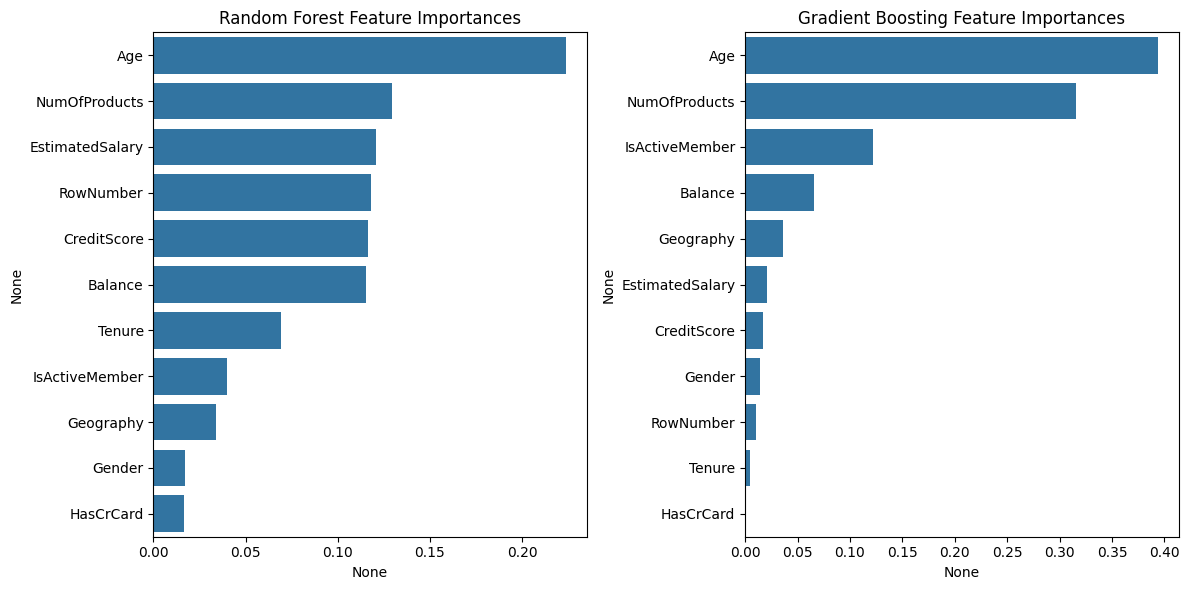

In [5]:
# Plot feature importances for Random Forest and Gradient Boosting
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
gb_importances = pd.Series(gb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=rf_importances, y=rf_importances.index)
plt.title('Random Forest Feature Importances')

plt.subplot(1, 2, 2)
sns.barplot(x=gb_importances, y=gb_importances.index)
plt.title('Gradient Boosting Feature Importances')

plt.tight_layout()
plt.show()
